##### Resources :
https://www.datacamp.com/community/tutorials/beginners-introduction-postgresql#comments

### Accessing a CloudSQL or Local database through your Python code Using SQLAlchemy
https://docs.sqlalchemy.org/en/13/ <br>
SQLAlchemy provides a more suitable engine to interface with your RDBMS.
Supported Dialects :
PostgreSQL | MySQL | SQLite | Oracle | Microsoft SQL Server

### Connecting to Google Cloud SQL Server

1. Connect to CloudSQL instance using CloudSQL proxy and SQL Alchemy.
   * For GCP accounts with permission Cloud SQL > Client, Admin etc. 
   * cloud_sql_proxy needs to be running and set-up on your local machine.
   * Lets the User update, modify the tables acc. to the permission given.
   
Refer : https://cloud.google.com/sql/docs/postgres/connect-external-app

2. Get Access via public IP Access (Not recommended for production instances)
   * Find your public IP using https://www.whatismyip.com/
   * Get the public IP added to list of allowed IPs by someone with apt. CloudSQL Role.
     ADD IP: CloudSQL-> covid19-data-server->Connections->Public IP -> Add network
   * Receive CloudSQL Instance Public IP and your username, password.
   * Use SQL Alchemy to connect.

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# Credentials
db_user = 'postgres'
db_password = '***REMOVED***'
cloud_sql_ip = '***REMOVED***'
db_name = 'covid19-india'

In [3]:
engine = create_engine(f'postgresql://{db_user}:{db_password}@{cloud_sql_ip}/{db_name}')

### Query the Data and Analyse!
<div>
<img src="DB_ERD.png" width="300"/>
</div>

In [4]:
# Query data from the tables according to the ERD.
states = pd.read_sql('SELECT * FROM states_info', engine , parse_dates = True, index_col ='Date')

In [5]:
testing = pd.read_sql('SELECT * FROM testing_stats', engine , parse_dates = True, index_col ='Date')

In [6]:
overall = pd.read_sql('SELECT * FROM overall_stats', engine, parse_dates = True, index_col ='Date')

In [7]:
main_join = overall.join(testing, on = 'Date', how = 'left')

In [8]:
main_join

,DailyConfirmed,DailyDeceased,DailyRecovered,TotalConfirmed,TotalDeceased,TotalRecovered,TestingSamples
Date,,,,,,,
2020-01-30,1,0,0,1,0,0,NaN
2020-01-31,0,0,0,1,0,0,NaN
2020-02-01,0,0,0,1,0,0,NaN
2020-02-02,1,0,0,2,0,0,NaN
2020-02-03,1,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...
2020-06-26,18255,381,10246,509448,15690,295918,7776228.0
2020-06-27,20142,414,14229,529590,16104,310147,7996707.0
2020-06-28,19610,384,11631,549200,16488,321778,8227802.0


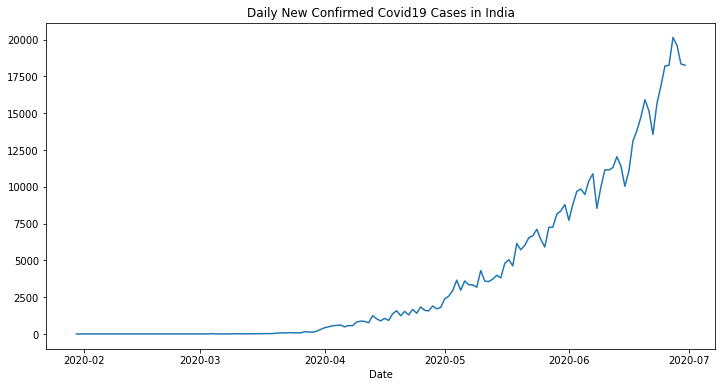

In [31]:
main_join['DailyConfirmed'].plot(figsize = (12,6), title = 'Daily New Confirmed Covid19 Cases in India')